In [2]:
import keras
from keras import layers
from keras import optimizers

import os

In [29]:
# project variables
VISUALIZATION_DIR = os.path.join(os.getcwd(), 'visualizations')
TRAIN_DIR = os.path.join(os.getcwd(), 'data/sorted')

# fixed parameters
NUM_CLASSES = 3
class_names = [
    'temari',
    'zinc',
    'selenium'
]

# hyperparameters
BATCH_SIZE = 32

In [30]:
# build model # based off of Chollet Listing 5.13
model = keras.Sequential(
    [
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)), # 32 filters, 3x3 kernel size
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(), # lose one dimension
        layers.Dropout(0.5),
        layers.Dense(512, activation='relu'),
        layers.Dense(NUM_CLASSES, activation='softmax')
    ]
)

model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

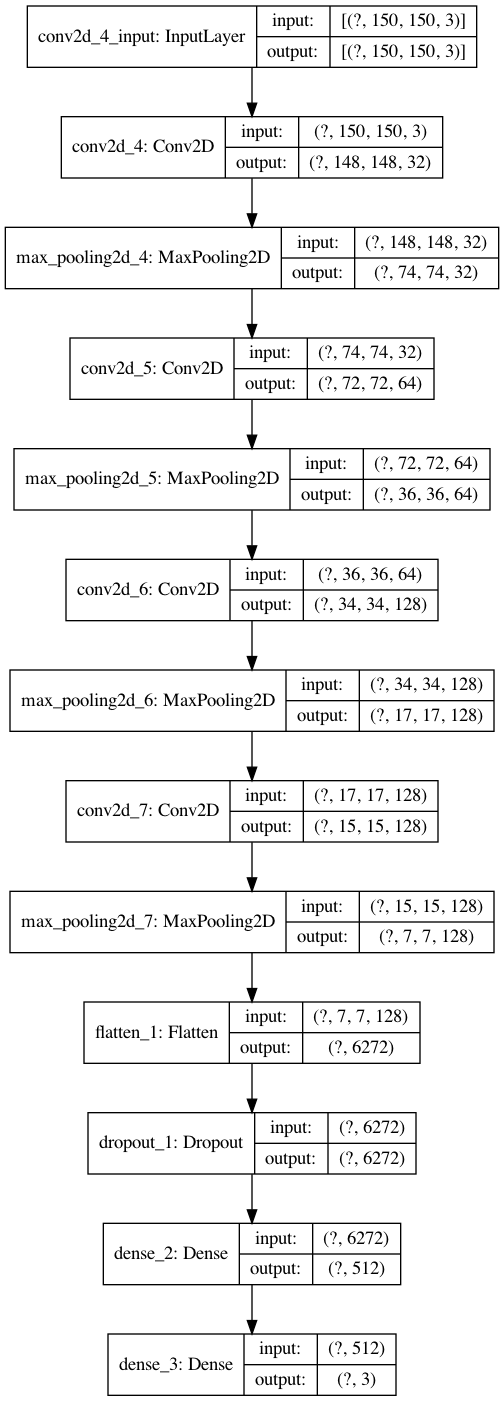

In [32]:
# plot the model 
dot_img_file = os.path.join(VISUALIZATION_DIR, 'model_architecture.png')
keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

In [33]:
# initialize data augmentation/generator 
# (based off of listing 5.14 in Chollet)
from keras.preprocessing.image import ImageDataGenerator

train_validation_datagen = ImageDataGenerator(
    validation_split = 0.2,
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_validation_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(150, 150),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 395 images belonging to 3 classes.


In [ ]:
# fit to training data
history = model.fit(
    train_validation_generator,
    steps_per_epoch=316//BATCH_SIZE,
    epochs=25,
    validation_steps=316//BATCH_SIZE
)

Epoch 1/25
9/9 [==============================] - 22s 2s/step - loss: 0.9172 - acc: 0.6217
Epoch 2/25
9/9 [==============================] - 23s 3s/step - loss: 0.9216 - acc: 0.6442
Epoch 3/25
9/9 [==============================] - 27s 3s/step - loss: 0.8696 - acc: 0.6704
Epoch 4/25
9/9 [==============================] - 24s 3s/step - loss: 0.8862 - acc: 0.6517
Epoch 5/25
9/9 [==============================] - 24s 3s/step - loss: 0.8913 - acc: 0.6667
Epoch 6/25
9/9 [==============================] - 25s 3s/step - loss: 0.8893 - acc: 0.6517
Epoch 7/25
9/9 [==============================] - 24s 3s/step - loss: 0.8676 - acc: 0.6667
